# Data Analytics with Python Assignment 1 Notebook

## Pre-Loading
Before loading any data, inspect the file using a text editor, such as notepad++.
The Movie details dataset is a csv with headings.
The Movie online streaming service dataset is also a csv with headings.

In [1]:
# Import our Libraries
import pandas as pd # A powerful library for storing and manipulating large tables via the DataFrame
pd.options.mode.chained_assignment = None  # default='warn'
# Disabling a warning pertaining to certain copy actions taken in the notebook
# I fully understand that the smarter thing to do is learn the alternate method that doesn't trigger the false positive
# however I do not have enough time, so I'll pin it for later
import numpy as np # A diverse library for comprehensive mathematical operations
import matplotlib.pyplot as plt # A useful library for the creation of useful visualisations

## Loading

In [2]:
# Load our data onto some DataFrames
movie_detail_path = "./dataset/movie_details.csv"
movie_streams_path = "./dataset/movie_streams.csv"
movie_detail = pd.read_csv(movie_detail_path)
movie_streams = pd.read_csv(movie_streams_path)

Now we check the DataFrames to ensure they loaded correctly

In [3]:
movie_detail.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0


In [4]:
movie_streams.head()

,ID,Title,Netflix,Hulu,Prime Video,Disney+
0,13825,The Jungle Book: Search for the Lost Treasure,0,0,1,0
1,15943,Vellaiya Irukiravan Poi Solla Maatan,0,0,1,0
2,6233,Hollows Grove,0,0,1,0
3,16194,Web of the Spider,0,0,1,0
4,7870,Life in Danger,0,0,1,0


## Examination of initial data

Currently the only matching column for both datasets is the Title. Additionally the detail dataset has many NaN values.

Let's look at the two datasets in general

In [5]:
movie_detail.describe(include="all")

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
count,15069,15069.000000,6609,14543.000000,4636,14396,14814,14672,14521,14533.000000
unique,15069,NaN,5,NaN,99,10397,1794,1204,1018,NaN
top,Robert,NaN,18+,NaN,100%,Jay Chapman,Drama,United States,English,NaN
freq,1,NaN,3124,NaN,365,34,1203,7865,9853,NaN
mean,NaN,2003.086734,NaN,5.907206,NaN,NaN,NaN,NaN,NaN,93.433978
std,NaN,20.592520,NaN,1.346995,NaN,NaN,NaN,NaN,NaN,28.536275
min,NaN,1913.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2001.000000,NaN,5.100000,NaN,NaN,NaN,NaN,NaN,82.000000
50%,NaN,2012.000000,NaN,6.100000,NaN,NaN,NaN,NaN,NaN,92.000000
75%,NaN,2016.000000,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,104.000000


In [6]:
print(movie_detail["Age"].unique())

[nan '18+' '13+' '16+' 'all' '7+']


The column information for movie_detail is as follows:

- Title: The title of the film. (String)

- Year: The year of release of the film. (Integer)

- Age: The age category of the film (Strings) ('18+' '13+' '16+' 'all' '7+')

- IMDb: The IMDb rating, between 0 and 10 (Float, 1 decimal)

- Rotten Tomatoes: The Rotten Tomatoe rating, expressed as a percentage. (String)

- Directors: The Directors of the film (String, comma seperators)

- Genres: The Genres of the film (String, comma seperators)

- Country: The Countries the film has been released in (String, comma seperators)

- Language: The available languages of the film (String, comma seperators)

- Runtime: The legnth of the movie, in minutes. (Integer)

In [7]:
movie_streams.describe(include="all")

,ID,Title,Netflix,Hulu,Prime Video,Disney+
count,15069.000000,15069,15069.000000,15069.000000,15069.000000,15069.000000
unique,NaN,15069,NaN,NaN,NaN,NaN
top,NaN,Robert,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN
mean,8355.178778,NaN,0.212290,0.053421,0.738669,0.033579
std,4836.080332,NaN,0.408943,0.224879,0.439375,0.180149
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,4154.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,8331.000000,NaN,0.000000,0.000000,1.000000,0.000000
75%,12548.000000,NaN,0.000000,0.000000,1.000000,0.000000


The column information for movie_streams is as follows:

- ID: The movie ID (Integer)

- Title: The title of the movie (String)

- Netflix: A flag for if the movie is on Netflix (Bool)

- Hulu: A flag for if the movie is on Hulu (Bool)

- Prime Video: A flag for if the movie is on Prime Video (Bool)

- Disney+: A flag for if the movie is on Disney+ (Bool)

## Merging

The size of the two datasets appears identical, so we'll attempt to merge the two datasets via the shared "Title" column

In [8]:
joined_data = pd.merge(movie_detail, movie_streams, how="left", on = "Title")
joined_data.describe(include="all")

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+
count,15069,15069.000000,6609,14543.000000,4636,14396,14814,14672,14521,14533.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000
unique,15069,NaN,5,NaN,99,10397,1794,1204,1018,NaN,NaN,NaN,NaN,NaN,NaN
top,Robert,NaN,18+,NaN,100%,Jay Chapman,Drama,United States,English,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,3124,NaN,365,34,1203,7865,9853,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2003.086734,NaN,5.907206,NaN,NaN,NaN,NaN,NaN,93.433978,8371.433584,0.209715,0.053267,0.741488,0.033152
std,NaN,20.592520,NaN,1.346995,NaN,NaN,NaN,NaN,NaN,28.536275,4829.592207,0.407120,0.224573,0.437833,0.179040
min,NaN,1913.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2001.000000,NaN,5.100000,NaN,NaN,NaN,NaN,NaN,82.000000,4172.500000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2012.000000,NaN,6.100000,NaN,NaN,NaN,NaN,NaN,92.000000,8338.000000,0.000000,0.000000,1.000000,0.000000
75%,NaN,2016.000000,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,104.000000,12568.500000,0.000000,0.000000,1.000000,0.000000


Approximately 1600 titles from the stream database were lost in the left join, equating to just over 10% of the original list.  There is currently no way to identify the original source of the databases used, so the error cannot be corrected. Instead the dropped data will be subsequentially loaded into a dataframe. This will allow future analysis should the need arise.

In [9]:
dropped_db_streams = pd.merge(movie_detail, movie_streams, how="outer", on="Title", indicator = True).loc[lambda x : x['_merge']=="right_only"]
dropped_db_streams.describe(include='all')

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+,_merge
count,1646,0.0,0,0.0,0,0,0,0,0,0.0,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646
unique,1646,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Awful Nice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1646
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8222.622114,0.233293,0.054678,0.715674,0.037060,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888.132307,0.423056,0.227420,0.451230,0.188965,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956.250000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8259.500000,0.000000,0.000000,1.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12379.750000,0.000000,0.000000,1.000000,0.000000,NaN


## Cleaning

For the NaN values, the approach will be to drop any NaNs in target columns that cannot be inferred and also represent a small portion of the overal data. These columns are Genres, Country, Language and IMDb.

In [10]:
joined_data_drop = joined_data.dropna(subset=["IMDb", "Genres", "Country", "Language"])
joined_data_drop.describe(include="all")

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+
count,14148,14148.000000,6459,14148.000000,4585,13822,14148,14148,14148,13964.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000
unique,14148,NaN,5,NaN,99,9975,1757,1171,1001,NaN,NaN,NaN,NaN,NaN,NaN
top,An Orphan on the Streets,NaN,18+,NaN,100%,Jay Chapman,Drama,United States,English,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,3084,NaN,350,33,1142,7582,9582,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2002.531029,NaN,5.904191,NaN,NaN,NaN,NaN,NaN,94.011744,8380.348885,0.208204,0.054749,0.740935,0.034992
std,NaN,20.884173,NaN,1.341961,NaN,NaN,NaN,NaN,NaN,28.082350,4836.167938,0.406040,0.227498,0.438139,0.183766
min,NaN,1913.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1999.000000,NaN,5.100000,NaN,NaN,NaN,NaN,NaN,83.000000,4168.500000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2011.000000,NaN,6.100000,NaN,NaN,NaN,NaN,NaN,92.000000,8364.000000,0.000000,0.000000,1.000000,0.000000
75%,NaN,2016.000000,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,105.000000,12596.500000,0.000000,0.000000,1.000000,0.000000


This strip only impacted ~800 titles. Leaving a database with ~14,000 titles, each with an IMDb rating and a valid Genre, Country and Language listing.

Next, converting the Rotten Tomatoes values to a value similar to IMDb, by first stripping the '%' and then dividing by 100.

In [11]:
joined_data_drop["Rotten Tomatoes"].fillna("%", inplace=True)

In [12]:
joined_data_drop['Rotten Tomatoes'] = joined_data_drop['Rotten Tomatoes'].map(lambda x: x.rstrip("%"))
joined_data_drop["Rotten Tomatoes"] = joined_data_drop["Rotten Tomatoes"].fillna("0")
joined_data_drop["Rotten Tomatoes"] = pd.to_numeric(joined_data_drop["Rotten Tomatoes"])
joined_data_drop["Rotten Tomatoes"] = joined_data_drop["Rotten Tomatoes"]/10
joined_data_drop.describe(include='all')

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+
count,14148,14148.000000,6459,14148.000000,4585.000000,13822,14148,14148,14148,13964.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000
unique,14148,NaN,5,NaN,NaN,9975,1757,1171,1001,NaN,NaN,NaN,NaN,NaN,NaN
top,An Orphan on the Streets,NaN,18+,NaN,NaN,Jay Chapman,Drama,United States,English,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,3084,NaN,NaN,33,1142,7582,9582,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2002.531029,NaN,5.904191,6.530578,NaN,NaN,NaN,NaN,94.011744,8380.348885,0.208204,0.054749,0.740935,0.034992
std,NaN,20.884173,NaN,1.341961,2.661761,NaN,NaN,NaN,NaN,28.082350,4836.167938,0.406040,0.227498,0.438139,0.183766
min,NaN,1913.000000,NaN,0.000000,0.200000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1999.000000,NaN,5.100000,4.400000,NaN,NaN,NaN,NaN,83.000000,4168.500000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2011.000000,NaN,6.100000,7.100000,NaN,NaN,NaN,NaN,92.000000,8364.000000,0.000000,0.000000,1.000000,0.000000
75%,NaN,2016.000000,NaN,6.900000,8.800000,NaN,NaN,NaN,NaN,105.000000,12596.500000,0.000000,0.000000,1.000000,0.000000


The intention of determining a singuar score is to take the average value between IMDb and Rotten Tomatoes. If the movie lacks a Rotten Tomatoes, then the average will just be the IMDb value. Using fillna will assist in completing the Rotten Tomatoes column.

In [13]:
joined_data_drop["Rotten Tomatoes"].fillna(joined_data_drop["IMDb"], inplace=True)

Now we'll create two new columns. The first is the average score across both IMDb and Rotten Tommatoes, and the second is whether the film has "French" in the Language or not.

In [14]:
joined_data_drop["Score"] = (joined_data_drop["IMDb"]+joined_data_drop["Rotten Tomatoes"])/2
joined_data_drop["French"] = joined_data_drop["Language"].str.contains('French', regex=False)

To make use of the Genres column, we'll apply str.split to turn it into a list, rather than a single string, divided by commas.

In [15]:
joined_data_drop["Genres"]=joined_data_drop["Genres"].str.split(pat=r',')

In [26]:
joined_data_drop.describe(include="all")

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+,Score,French
count,14148,14148.000000,6459,14148.000000,14148.000000,13822,14148,14148,14148,13964.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000,14148.000000,14148
unique,14148,NaN,5,NaN,NaN,9975,1757,1171,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,An Orphan on the Streets,NaN,18+,NaN,NaN,Jay Chapman,[Drama],United States,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,NaN,3084,NaN,NaN,33,1142,7582,9582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13444
mean,NaN,2002.531029,NaN,5.904191,5.953230,NaN,NaN,NaN,NaN,94.011744,8380.348885,0.208204,0.054749,0.740935,0.034992,5.928711,NaN
std,NaN,20.884173,NaN,1.341961,1.956076,NaN,NaN,NaN,NaN,28.082350,4836.167938,0.406040,0.227498,0.438139,0.183766,1.557374,NaN
min,NaN,1913.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1999.000000,NaN,5.100000,4.700000,NaN,NaN,NaN,NaN,83.000000,4168.500000,0.000000,0.000000,0.000000,0.000000,4.900000,NaN
50%,NaN,2011.000000,NaN,6.100000,6.000000,NaN,NaN,NaN,NaN,92.000000,8364.000000,0.000000,0.000000,1.000000,0.000000,6.075000,NaN
75%,NaN,2016.000000,NaN,6.900000,7.200000,NaN,NaN,NaN,NaN,105.000000,12596.500000,0.000000,0.000000,1.000000,0.000000,7.100000,NaN


## Analysis
To begin, we'll start by gaining the total counts of Genres and Age groups for any film with French listed

In [17]:
Genre_Totals = joined_data_drop["Genres"].where(joined_data_drop["French"]==True).explode().value_counts()
Genre_Totals

Drama          422
Comedy         171
Thriller       157
Romance        155
Action         101
Adventure       96
Documentary     94
Crime           83
Mystery         73
Family          63
History         62
Biography       59
Fantasy         57
War             54
Horror          44
Animation       42
Sci-Fi          37
Music           29
Musical         19
Sport           11
Western         10
Short            6
News             4
Name: Genres, dtype: int64

In [18]:
Age_Totals = joined_data_drop["Age"].where(joined_data_drop["French"]==True).value_counts()
Age_Totals

18+    164
13+     73
7+      66
all     27
16+     13
Name: Age, dtype: int64

An Age by Genre list could also produce good insight, so we'll produce one of those.

In [19]:
Age_By_Genre = joined_data_drop[["Genres", "Age"]].where(joined_data_drop["French"]==True).explode("Genres").value_counts().sort_index(level=1)#.groupby("Genres").sum()
Age_By_Genre

Genres     Age
Action     13+    20
Adventure  13+    15
Animation  13+     1
Biography  13+    10
Comedy     13+    25
                  ..
Mystery    all     3
Romance    all     5
Sci-Fi     all     1
Sport      all     2
Thriller   all     1
Length: 93, dtype: int64

In [20]:
Age_By_Genre_Trim = Age_By_Genre.nsmallest(5)
Age_By_Genre_Trim

Genres     Age
Animation  13+    1
Musical    13+    1
News       13+    1
Western    13+    1
Adventure  16+    1
dtype: int64

In [21]:
Score_Tops = joined_data_drop.loc[joined_data_drop["Score"] > 8.0]
Score_Totals = Score_Tops[["Title", "Age", "Genres", "Score"]].where(Score_Tops["French"] == True).dropna()
Split_Score_Totals = pd.DataFrame(Score_Totals["Genres"].tolist(),columns=["Genre 1", "Genre 2", "Genre 3", "Genre 4", "Genre 5", "Genre 6", "Genre 7", "Genre 8"])
Score_Total_Fix = pd.concat([Score_Totals.reset_index(drop=True), Split_Score_Totals.reset_index(drop=True)], axis=1)

Now we have a nice list of the top and least occuring genres and the top and least occuring age brackets for all French films in the data set. We also have a list of all the high scoring films with French.

## Visualisation
Now we'll visualise our data

Text(0.5, 1.0, 'French Films by Genre')

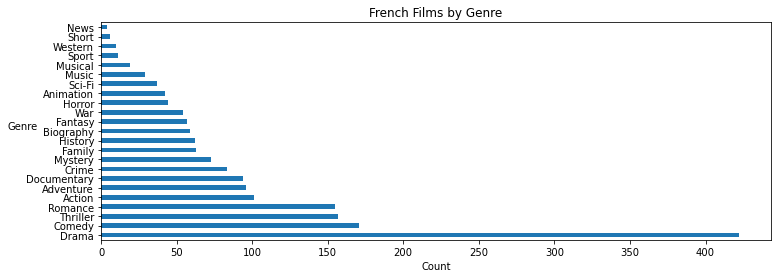

In [22]:
ax = Genre_Totals.plot(kind="barh", figsize=(12,4))
ax.set_ylabel('Genre', rotation = 0)
ax.set_xlabel('Count')
ax.set_title("French Films by Genre")

Text(0.5, 1.0, 'French Films by Age')

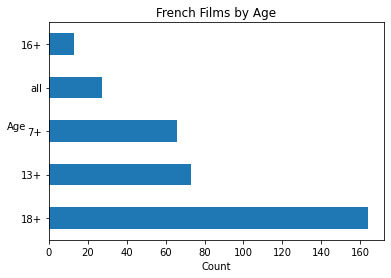

In [23]:
ax = Age_Totals.plot(kind='barh')
ax.set_ylabel('Age', rotation = 0)
ax.set_xlabel('Count')
ax.set_title("French Films by Age")

Text(0.5, 1.0, 'French Films by Age and Genre')

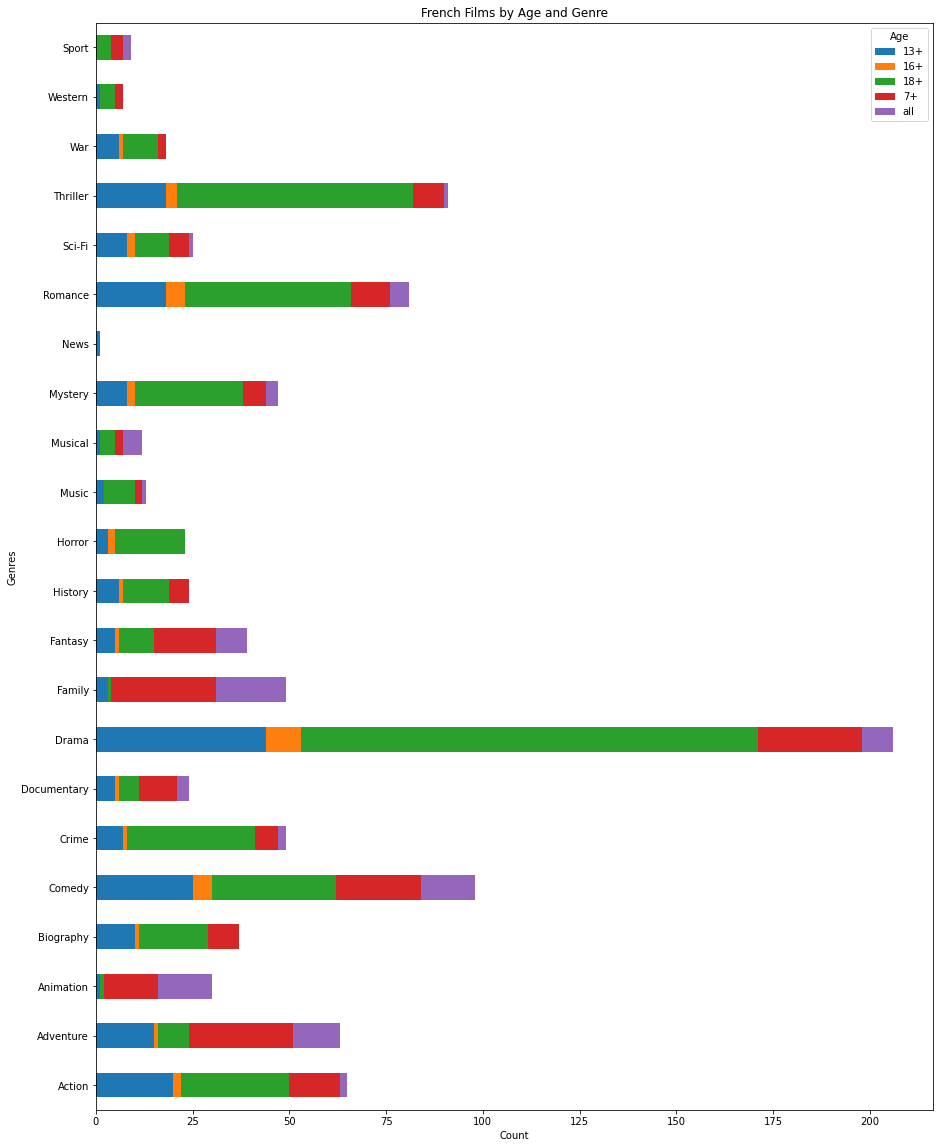

In [24]:
ax = Age_By_Genre.unstack(level=1).plot(kind='barh', figsize=(15,20), stacked=True)
ax.set_xlabel('Count')
ax.set_title("French Films by Age and Genre")

In [25]:
Top_Movies_I = Score_Total_Fix.groupby(['Genre 1'])["Score"].transform(max) == Score_Total_Fix["Score"]
Top_Movies = Score_Total_Fix[Top_Movies_I]
Top_Movies

,Title,Age,Genres,Score,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8
1,Inception,13+,"[Action, Adventure, Sci-Fi, Thriller]",8.75,Action,Adventure,Sci-Fi,Thriller,None,None,None,None
2,It's a Wonderful Life,7+,"[Drama, Family, Fantasy]",9.00,Drama,Family,Fantasy,None,None,None,None,None
6,McQueen,18+,"[Documentary, Biography]",8.85,Documentary,Biography,None,None,None,None,None,None
10,Portrait of a Lady on Fire,18+,"[Drama, Romance]",9.00,Drama,Romance,None,None,None,None,None,None
13,Monty Python and the Holy Grail,7+,"[Adventure, Comedy, Fantasy]",8.95,Adventure,Comedy,Fantasy,None,None,None,None,None
14,The Lion King,all,"[Animation, Adventure, Drama, Family, Musical]",8.90,Animation,Adventure,Drama,Family,Musical,None,None,None
15,The Discreet Charm of the Bourgeoisie,7+,[Comedy],8.85,Comedy,None,None,None,None,None,None,None
21,I Am Not Your Negro,18+,[Documentary],8.85,Documentary,None,None,None,None,None,None,None
32,His Girl Friday,7+,"[Comedy, Drama, Romance]",8.85,Comedy,Drama,Romance,None,None,None,None,None
54,The Social Network,13+,"[Biography, Drama]",8.65,Biography,Drama,None,None,None,None,None,None
